<a href="https://colab.research.google.com/github/tejaswini8213/Perception-Lab/blob/main/Image_processing_operations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
from PIL import Image
import math

In [13]:
input = cv2.imread('image.jpg')

In [14]:
(h, w) = img.shape[:2]
new_width = 400
aspect_ratio = h / w
new_height = int(new_width * aspect_ratio)
img = cv2.resize(input, (new_width, new_height))

Topological operation

In [7]:
# Generating desired test image with red and green dot at desired locations # Black 28x28 image
image = np.zeros((28,28,3), np.uint8)
# Choose red pixel location
image[10,15] = [0,0,255]
# Choose green pixel location
image[21,23] = [0,255,0]
# Save image
cv2_imshow(image)
# Finding distance between the pixels
x1,y1,x2,y2 = 10,15,21,23
print("Distance : ", math.sqrt((x2-x1)**2 - (y2-y1)**2))

Distance :  7.54983443527075


Image negative

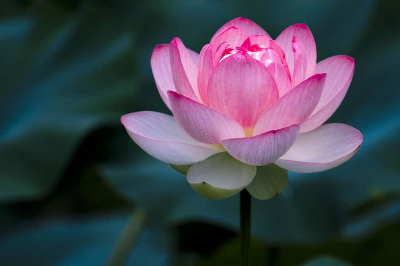

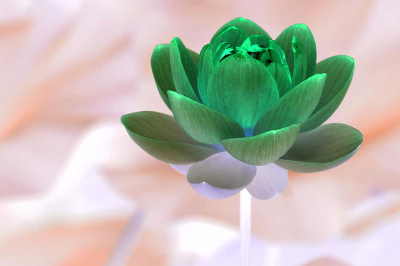

In [15]:
L = img.max()
# Subtract each intensity from max to obtain negative
negative = L - img
cv2_imshow(img)
cv2_imshow(negative)

Power Law Transform

Usage Scenarios:
1.   Improving image brightness/contrast:
*   Make dark images brighter or overly bright images darker.
2.   Image preprocessing:
*   Enhance image visibility before performing tasks like object detection, OCR, or segmentation
3.  Perceptual adjustment:
*  Match the image appearance to how the human eye perceives brightness.














        





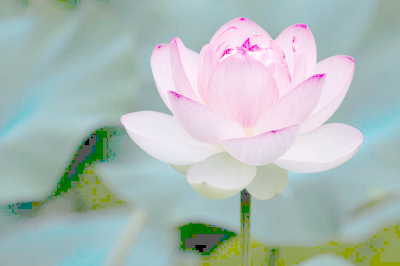

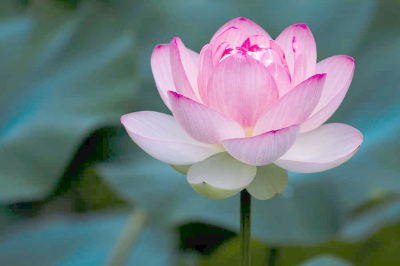

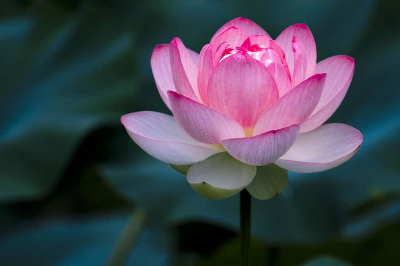

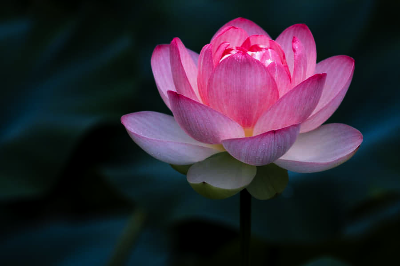

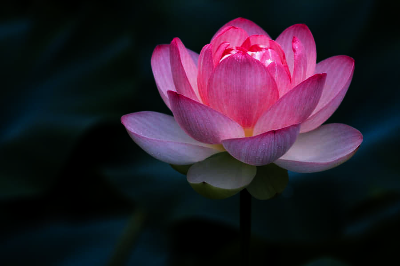

In [17]:
for gamma in [0.2, 0.5, 1, 1.5, 1.8]:
      gamma_transformation = np.array(255*(img / 255) ** gamma, dtype = 'uint8')
      cv2_imshow(gamma_transformation)

Contrast stretching

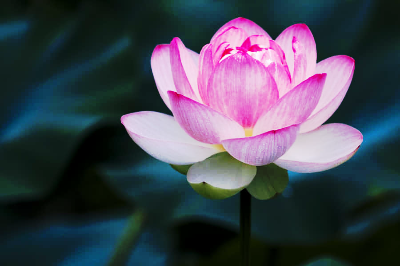

In [18]:
def Contrast_stretch(p, r1, s1, r2, s2):
  if (0 <= p and p <= r1):
    equation = (s1 / r1)*p
  elif (r1 < p and p <= r2):
    equation = ((s2 - s1)/(r2 - r1))*(p - r1)+s1
  else:
    equation = ((255 - s2)/(255 - r2))*(p - r2)+s2
  return equation

r1 = 55
s1 = 40
r2 = 140
s2 = 200
pixelVal_vec = np.vectorize(Contrast_stretch) # Contrast stretching
contrast = pixelVal_vec(resized_image, r1, s1, r2, s2)
cv2_imshow(contrast)

Average neighbourhood operation

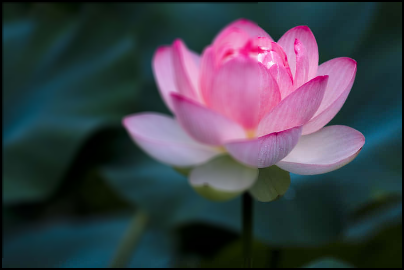

In [19]:
mod_image = cv2.copyMakeBorder(resized_image, 2, 2, 2, 2, cv2.BORDER_CONSTANT, None, value = 0)
img_cpy = mod_image.copy()
for i in range(2,258):
  for j in range(2,258):
    vector_sum = 0
    n=0

# Fetch all neighbours for middle element of a 5x5 matrix
    for k in range(i-2,i+3):
      for l in range(j-2,j+3):
        n+=1
        vector_sum+= mod_image[k,l].astype(int)

      vector_mean = (vector_sum - mod_image[i,j]) / (n-1)
      img_cpy[i,j] = vector_mean
cv2_imshow(img_cpy)


Minimum neighbourhood operation

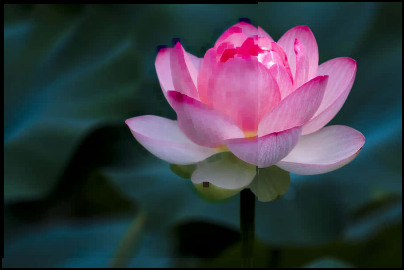

In [20]:
image = cv2.copyMakeBorder(resized_image, 2, 2, 2, 2, cv2.BORDER_CONSTANT, None, value = 0)
img2 = image.copy()
for i in range(2,258):
  for j in range(2,258):
    neighbors = []
    for k in range(i-2,i+3):
      for l in range(j-2,j+3):
        neighbors.append(image[k,l])
    minimum = np.amin(neighbors, axis = 0)
    img2[i,j] = minimum
cv2_imshow(img2)


Histogram equalization

Equalized Image:


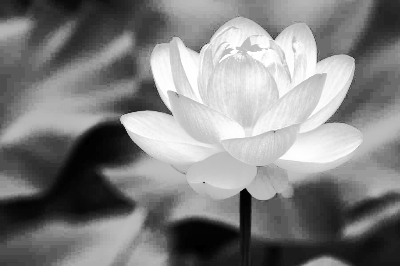

In [24]:
from __future__ import print_function
import argparse

class ArgParser:
    def __init__(self, input_image):
        self.input = input_image
args = ArgParser('test1.jpeg')

if resized_image is None:
    print('Could not open or find the image:', args.input)
    exit(0)

# Convert to grayscale
src = cv2.cvtColor(resized_image, cv2.COLOR_BGR2GRAY)

# Perform histogram equalization
dst = cv2.equalizeHist(src)
print("Equalized Image:")
cv2_imshow(dst)
